In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv',encoding='utf-8')
test = pd.read_csv('test.csv',encoding='utf-8')
print('训练集：',train.shape)
print('测试集：',test.shape)

训练集： (891, 12)
测试集： (418, 11)


In [3]:
full = pd.concat([train,test],ignore_index=True)
full.shape

(1309, 12)

In [4]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

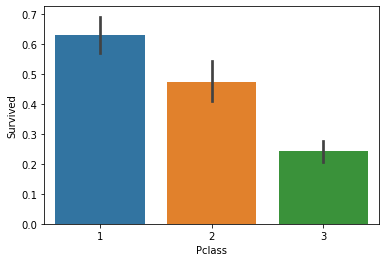

In [6]:
sns.barplot(x="Pclass", y="Survived", data=full)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

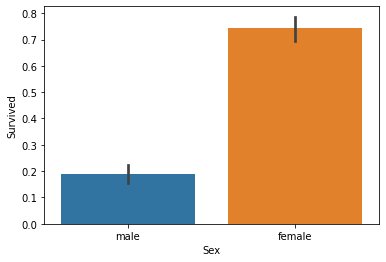

In [7]:
sns.barplot(x="Sex", y="Survived", data=full)

Text(28.088425925925918, 0.5, 'Survived')

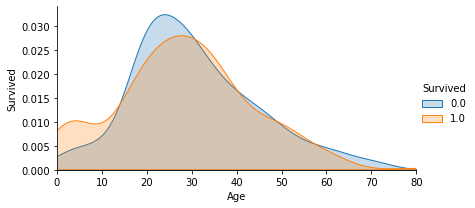

In [8]:
facet = sns.FacetGrid(full, hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlabel('Age') 
plt.ylabel('Survived') 

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

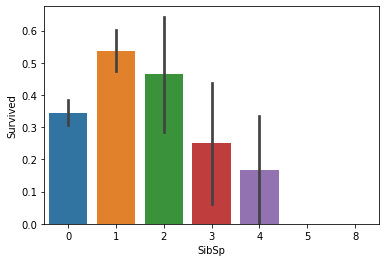

In [9]:
sns.barplot(x="SibSp", y="Survived", data=full)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

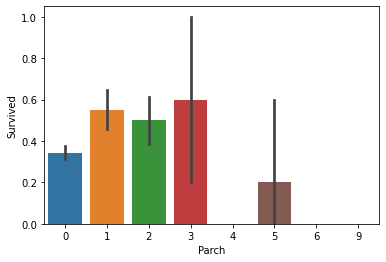

In [10]:
sns.barplot(x="Parch", y="Survived", data=full)

<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

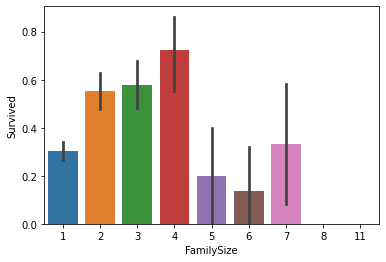

In [11]:
full['FamilySize']=full['SibSp']+full['Parch']+1
sns.barplot(x="FamilySize", y="Survived", data=full)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

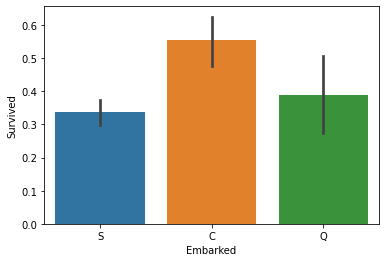

In [12]:
sns.barplot(x="Embarked",y='Survived',data=full)

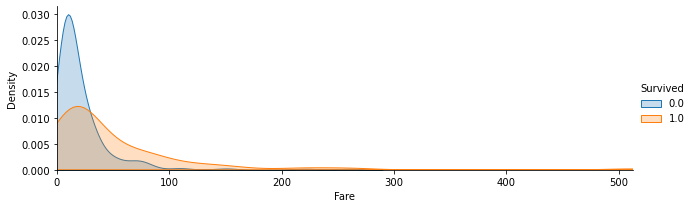

In [13]:
Facet = sns.FacetGrid(full,hue='Survived',aspect = 3)
Facet.map(sns.kdeplot,'Fare',shade=True)
Facet.set(xlim=(0,full["Fare"].max()))
Facet.add_legend()

In [14]:
full['Title'] = full.Name.map(lambda x:x.split(',')[1].split('.')[0].strip())  
#姓名中头衔字符串与定义头衔类别的映射关系
title_Dict={
    'Capt':           'Officer', #政府官员
    'Col':            'Officer',
    'Don':            'Royalty', #王室
    'Dona':           'Royalty',
    'Dr':             'Officer',
    'Jonkheer':       'Master', #专家
    'Lady':           'Royalty',
    'Major':          'Officer',
    'Master':         'Master',
    'Miss':           'Miss', #未婚女子
    'Mlle':           'Miss',
    'Mme':            'Mrs', #已婚男子
    'Mr':             'Mr', #未婚男子
    'Mrs':            'Mrs',
    'Ms':             'Mrs',
    'Rev':            'Officer',
    'Sir':            'Royalty',
    'the Countess':   'Royalty'
}
full['Title'] = full['Title'].map(title_Dict)


<AxesSubplot:xlabel='Title', ylabel='Survived'>

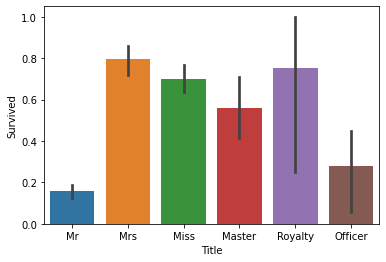

In [15]:
sns.barplot(x='Title',y='Survived',data=full)

In [16]:
full['Cabin'] = full['Cabin'].fillna('U')
full['Deck'] = full['Cabin'].map(lambda x: x[0])

<AxesSubplot:xlabel='Deck', ylabel='Survived'>

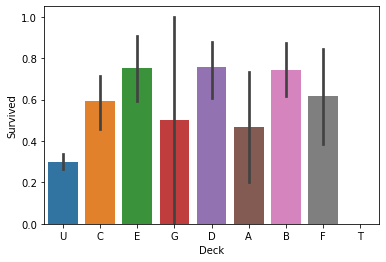

In [17]:
sns.barplot(x='Deck',y='Survived',data=full)

In [18]:
full['Ticket'].value_counts()

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

<AxesSubplot:xlabel='TicketGroup', ylabel='Survived'>

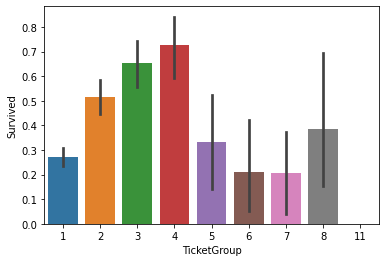

In [19]:
Ticket_Count = dict(full['Ticket'].value_counts())
full['TicketGroup'] = full['Ticket'].apply(lambda x:Ticket_Count[x])
sns.barplot(x='TicketGroup',y='Survived',data=full)

<AxesSubplot:xlabel='TicketGroup', ylabel='Survived'>

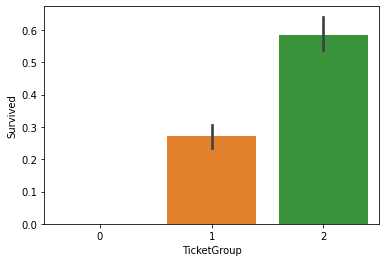

In [20]:
def Ticket_label(TicketGroup):
    if 2 <= TicketGroup <= 4:
        return 2
    elif  8 >= TicketGroup > 4 or TicketGroup ==1:
        return 1
    else:
        return 0 
full['TicketGroup'] = full['TicketGroup'].apply(Ticket_label)
sns.barplot(x='TicketGroup',y='Survived',data=full)

In [21]:
full[full['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,Deck,TicketGroup
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,U,S,1,Mr,U,1


In [22]:
full['Fare'] = full['Fare'].fillna(8.05)

In [23]:
full[full['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,Deck,TicketGroup
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1,Miss,B,2
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1,Mrs,B,2


In [24]:
full['Fare'].groupby([full['Pclass'],full['Embarked']]).median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [25]:
full["Embarked"] = full['Embarked'].fillna("C")

In [26]:
full['Cabin'] = full['Cabin'].fillna('U')

full['Deck'] = full['Cabin'].map(lambda x: x[0])
deckDF = pd.get_dummies(full['Deck'],prefix='Cabin')
full[full['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,Deck,TicketGroup


In [27]:
sex_mapDict = {'male':1,'female':0}
full['Sex'] = full['Sex'].map(sex_mapDict)

In [28]:
from sklearn.ensemble import RandomForestClassifier

ageDF = full[['Age', 'Pclass','Sex','Title']]
ageDF = pd.get_dummies(ageDF)
known_age = ageDF[ageDF.Age.notnull()].values
unknown_age = ageDF[ageDF.Age.isnull()].values
y = known_age[:, 0]
X = known_age[:, 1:]
rfr = RandomForestClassifier(random_state=0, n_estimators=100, n_jobs=-1)
rfr.fit(X, y.astype(int))
predictedAges = rfr.predict(unknown_age[:, 1::])
full.loc[ (full.Age.isnull()), 'Age' ] = predictedAges


In [29]:
full['Age'].size

1309

In [30]:
familyDF = pd.DataFrame()
familyDF['FamilySize'] = full['SibSp']+full['Parch']+1
familyDF['Family_Single'] = familyDF['FamilySize'].map(lambda s: 1 if ((2<=s<5)|(s==1)) else 0)
familyDF['Family_Small'] = familyDF['FamilySize'].map(lambda s: 1 if 5<=s<=7 else 0)
familyDF['Family_Large'] = familyDF['FamilySize'].map(lambda s: 1 if s>7 else 0)

In [31]:
deckDF = pd.get_dummies(full['Deck'],prefix='Cabin')
embarkedDF = pd.get_dummies(full['Embarked'],prefix='Embarked')
titleDF = pd.get_dummies(full['Title'],prefix='Title')
pclassDF = pd.get_dummies(full['Pclass'],prefix='Pclass')
full = pd.concat([full,pclassDF,titleDF,familyDF,deckDF,embarkedDF],axis=1)
full.drop(['Pclass','Title','Embarked','Deck'],axis=1,inplace=True)
full.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,U,...,0,0,0,0,0,0,1,0,0,1
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,...,1,0,0,0,0,0,0,1,0,0
2,3,1.0,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,U,...,0,0,0,0,0,0,1,0,0,1
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,...,1,0,0,0,0,0,0,0,0,1
4,5,0.0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,U,...,0,0,0,0,0,0,1,0,0,1


In [32]:
'''
#--------------------------------------------------------------------------

异常值处理：（参考kaggle高分大佬的经验，但是在我实际测试中得出的准确率并没有明显提高，故并未使用）
把姓氏相同的乘客划分为同一组，从人数大于1的组中分别提取出每组的妇女儿童和成年男性。

full['Surname'] = full['Name'].apply(lambda x:x.split(',')[0].strip())
Surname_Count = dict(full['Surname'].value_counts())
full['FamilyGroup'] = full['Surname'].apply(lambda x:Surname_Count[x])
Female_Child_Group = full.loc[(full['FamilyGroup']>=2) & ((full['Age']<=12) | (full['Sex']=='female'))]
Male_Adult_Group = full.loc[(full['FamilyGroup']>=2) & (full['Age']>12) & (full['Sex']=='male')]
#发现绝大部分女性和儿童组的平均存活率都为1或0，即同组的女性和儿童要么全部幸存，要么全部遇难。
Female_Child = pd.DataFrame(Female_Child_Group.groupby('Surname')['Survived'].mean().value_counts())
Female_Child.columns = ['GroupCount']

#绝大部分成年男性组的平均存活率也为1或0。
Male_Adult = pd.DataFrame(Male_Adult_Group.groupby('Surname')['Survived'].mean().value_counts())
Male_Adult.columns = ['GroupCount']


普遍规律是女性和儿童幸存率高，成年男性幸存较低，所以我们把不符合普遍规律的反常组选出来单独处理。
把女性和儿童幸存率为0的组设置为遇难组，把成年男性存活率为1的组设置为幸存组。

Female_Child_Group = Female_Child_Group.groupby('Surname')['Survived'].mean()
Dead_List=set(Female_Child_Group[Female_Child_Group.apply(lambda x:x==0)].index)

Male_Adult_List=Male_Adult_Group.groupby('Surname')['Survived'].mean()
Survived_List=set(Male_Adult_List[Male_Adult_List.apply(lambda x:x==1)].index)

#为了使处于这两种反常组中的样本能够被正确分类，对测试集中处于反常组中的样本的Age，Title，Sex进行惩罚修改。
train = full.loc[full['Survived'].notnull()]
test = full.loc[full['Survived'].isnull()]
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Sex'] = 1
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Age'] = 60
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Title'] = 'Mr'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Sex'] = 0
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Age'] = 5
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Title'] = 'Miss'


titleDF = pd.get_dummies(full['Title'],prefix='Title')


#重新划分数据，分出训练集和测试集
full = pd.concat([train, test])

#重新整合数据
full = pd.concat([full,pclassDF,titleDF,familyDF,deckDF,embarkedDF],axis=1)


#-------------------------------------------------------------------------------

'''

"\n#--------------------------------------------------------------------------\n\n异常值处理：（参考kaggle高分大佬的经验，但是在我实际测试中得出的准确率并没有明显提高，故并未使用）\n把姓氏相同的乘客划分为同一组，从人数大于1的组中分别提取出每组的妇女儿童和成年男性。\n\nfull['Surname'] = full['Name'].apply(lambda x:x.split(',')[0].strip())\nSurname_Count = dict(full['Surname'].value_counts())\nfull['FamilyGroup'] = full['Surname'].apply(lambda x:Surname_Count[x])\nFemale_Child_Group = full.loc[(full['FamilyGroup']>=2) & ((full['Age']<=12) | (full['Sex']=='female'))]\nMale_Adult_Group = full.loc[(full['FamilyGroup']>=2) & (full['Age']>12) & (full['Sex']=='male')]\n#发现绝大部分女性和儿童组的平均存活率都为1或0，即同组的女性和儿童要么全部幸存，要么全部遇难。\nFemale_Child = pd.DataFrame(Female_Child_Group.groupby('Surname')['Survived'].mean().value_counts())\nFemale_Child.columns = ['GroupCount']\n\n#绝大部分成年男性组的平均存活率也为1或0。\nMale_Adult = pd.DataFrame(Male_Adult_Group.groupby('Surname')['Survived'].mean().value_counts())\nMale_Adult.columns = ['GroupCount']\n\n\n普遍规律是女性和儿童幸存率高，成年男性幸存较低，所以我们把不符合普遍规律的反常组选出来单独处理。\n把女性和儿童幸存率为0

In [33]:
from sklearn.model_selection import train_test_split
full_X=pd.concat([full['Age'],
                  deckDF,
                  titleDF,
                  pclassDF,
                  familyDF,
                  #full['Fare'], #和存活度相关性较差
                  #embarkedDF, #和存活度相关性较差
                  full['Sex'],
                  full['TicketGroup']
                  ],axis = 1)

sourceRow = 891

source_X = full_X.loc[0:sourceRow-1,:]
source_y = full.loc[0:sourceRow-1,'Survived']

pred_X=full_X.loc[sourceRow:,:]
train_X, test_X, train_y, test_y = train_test_split(source_X, source_y, train_size=0.8)

print('原始数据集特征:', source_X.shape,
      '训练数据集特征:', train_X.shape,
      '测试数据集特征:', test_X.shape)

print('原始数据集标签:', source_y.shape,
      '训练数据集标签:', train_y.shape,
      '测试数据集标签:', test_y.shape)

原始数据集特征: (891, 25) 训练数据集特征: (712, 25) 测试数据集特征: (179, 25)
原始数据集标签: (891,) 训练数据集标签: (712,) 测试数据集标签: (179,)


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [35]:
#1.使用K临近算法模型
knc_model = KNeighborsClassifier(n_neighbors = 3)
knc_model.fit(train_X,train_y)

KNeighborsClassifier(n_neighbors=3)

In [36]:
#2.使用GDBT梯度提升树模型
gbc_model = GradientBoostingClassifier()
gbc_model.fit(train_X,train_y)

GradientBoostingClassifier()

In [37]:
#3.使用极度随机树模型
etc_model = ExtraTreesClassifier(random_state = 6, bootstrap=True, oob_score=True)
etc_model.fit(train_X,train_y)

ExtraTreesClassifier(bootstrap=True, oob_score=True, random_state=6)

In [38]:
#4.使用决策树模型
dtc_model = DecisionTreeClassifier()
dtc_model.fit(train_X,train_y)

DecisionTreeClassifier()

In [39]:
#5.使用逻辑回归模型
lr_model = LogisticRegression(penalty="l2",solver="liblinear",C=0.9850000000000004,max_iter=5000)
lr_model.fit(train_X,train_y)

LogisticRegression(C=0.9850000000000004, max_iter=5000, solver='liblinear')

In [40]:
#6,使用支持向量机svm模型
svm_model = SVC(C=10,kernel='rbf',gamma=0.05,decision_function_shape='ovr')
svm_model.fit(train_X,train_y)

SVC(C=10, gamma=0.05)

In [41]:
#7.使用随机森林模型:目前测试最好
rfc_model=RandomForestClassifier(random_state = 0,
                                 min_samples_split = 8,
                                 n_estimators = 180,
                                 min_samples_leaf=2,
                                 max_depth = 8)
rfc_model.fit(train_X,train_y)

RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=8,
                       n_estimators=180, random_state=0)

In [42]:
#k折交叉验证
def cross_score(X,y,mod):
     #简单看看打分情况
    scores=cross_val_score(mod,X,y,cv=10)
    print('交叉验证scores:',scores)
    print('交叉验证mean:',scores.mean())
    print('--------------------------------------\n')
    return scores.mean()

In [43]:
models = [knc_model,gbc_model,etc_model,dtc_model,lr_model,svm_model,rfc_model]
model_names = ['knc_model','gbc_model','etc_model','dtc_model','lr_model','svm_model','rfc_model']

In [44]:
def models_score(source_X,source_y,models,model_names,train_X, train_y,test_X, test_y):
    best_score = cross_val_score(models[0],source_X, source_y, cv=10).mean()
    best_score_name = model_names[0]
    i = 0
    best_model = models[0]
    for model in models:
        print(model_names[i], "train score:", model.score(train_X, train_y))
        print(model_names[i], "test score:", model.score(test_X, test_y))
        score = cross_score(source_X, source_y, model)
        if(score > best_score):
            best_score_name = model_names[i]
            best_score = score
            best_model = model
        i = i + 1
    print('the best score model is',best_score_name,',cross score is',best_score)
    return best_model

In [45]:
model = models_score(source_X,source_y,models,model_names,train_X, train_y,test_X, test_y)

/Users/zhangxinyu/miniforge3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/zhangxinyu/miniforge3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

knc_model train score: 0.8764044943820225
knc_model test score: 0.7932960893854749
交叉验证scores: [0.77777778 0.82022472 0.74157303 0.82022472 0.84269663 0.71910112
 0.83146067 0.78651685 0.85393258 0.79775281]
交叉验证mean: 0.7991260923845194
--------------------------------------

gbc_model train score: 0.8721910112359551
gbc_model test score: 0.8603351955307262
交叉验证scores: [0.81111111 0.85393258 0.7752809  0.87640449 0.83146067 0.79775281
 0.83146067 0.80898876 0.88764045 0.80898876]
交叉验证mean: 0.8283021223470662
--------------------------------------

etc_model train score: 0.9382022471910112
etc_model test score: 0.8156424581005587
交叉验证scores: [0.74444444 0.82022472 0.71910112 0.83146067 0.85393258 0.80898876
 0.82022472 0.7752809  0.8988764  0.83146067]
交叉验证mean: 0.81039950062422
--------------------------------------

dtc_model train score: 0.9382022471910112
dtc_model test score: 0.7821229050279329
交叉验证scores: [0.74444444 0.83146067 0.75280899 0.75280899 0.86516854 0.7752809
 0.8202247

In [46]:
import torch
import numpy as np
import pandas as pd

In [47]:
dl_train_X = torch.from_numpy(np.array(train_X))  # 将数据转化为tensor格式
dl_train_y = torch.from_numpy(np.array(train_y))
dl_test_X = torch.from_numpy(np.array(test_X))
dl_test_y = torch.from_numpy(np.array(test_y))
in_features = dl_train_X.shape[1]

In [48]:
# 构造网络模型
class model(torch.nn.Module):
    def __init__(self):
        super(model, self).__init__()
        self.linear1 = torch.nn.Linear(25, 64)#加上注释特征，输入为29
        self.linear2 = torch.nn.Linear(64, 10)
        self.linear3 = torch.nn.Linear(10, 1)
        self.sigmoid = torch.nn.Sigmoid()
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x

In [49]:
'''
#改良版的Net,效果一般
class model(nn.Module):
    def __init__(self):
        super(model, self).__init__()
        self.linear1 = nn.Linear(25, 64)#加上注释特征，输入为29
        self.linear2 = nn.Linear(64, 128)
        self.linear3 = nn.Linear(128, 32)
        self.linear4 = nn.Linear(32, 16)
        self.linear5 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        self.dropout = nn.Dropout(p=0.1)
    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.relu(self.dropout(self.linear2(x)))
        x = self.relu(self.dropout(self.linear3(x)))
        x = self.relu(self.linear4(x))
        x = self.softmax(self.linear5(x))
        return x
'''
dl_model = model()

In [50]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(dl_model.parameters(), lr=0.01)
epochs = 1000

In [51]:
# 训练
for epoch in range(epochs):
    # 正向传播
    y_pred = dl_model(dl_train_X.float())
    loss = criterion(torch.squeeze(y_pred), dl_train_y.float())
    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    # 更新参数
    optimizer.step()

In [52]:

'''
#提交模块：预测值为浮点型，需要转化整型提交
#1。sklearn模型提交
pred_Y = model.predict(pred_X)
pred_Y = pred_Y.astype(int)


#---------------------------------------------------------------

#2。自定义deep learning模型提交
pred_X = torch.from_numpy(np.array(pred_X))#转为tensor的形式
pred_Y = dl_model(pred_X.float())
pred_Y = pred_Y.detach().numpy()#将tensor转为ndarry形式
pred_Y = pred_Y.astype(int)#转为整型提交
'''

'''
#生成提交文件.csv
passenger_id = full.loc[sourceRow:,'PassengerId']

predDF = pd.DataFrame(
{
 'PassengerId':passenger_id,
 'Survived' :pred_Y
})

predDF.to_csv('zxy_titanic_pred.csv',index=False)
print('run successful')
'''
#最高排名已进入前6%

"\n#生成提交文件.csv\npassenger_id = full.loc[sourceRow:,'PassengerId']\n\npredDF = pd.DataFrame(\n{\n 'PassengerId':passenger_id,\n 'Survived' :pred_Y\n})\n\npredDF.to_csv('zxy_titanic_pred.csv',index=False)\nprint('run successful')\n"